# Diamond Price prediction 

In [96]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [97]:
# Loading The Data

df = pd.read_csv('Diamond Price prediction.csv')


In [98]:
# Call the dataframe and do the basic checks
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [99]:
# Dropping and renaming the data

df.drop('Unnamed: 0',axis = 1, inplace = True)

In [100]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [101]:
df.rename(columns={'x':'x_axis','y':'y_axis','z':'z_axis'},inplace = True)

In [102]:
df.columns

# Unwanted columns have been dropped and also some columns have been renamed

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x_axis',
       'y_axis', 'z_axis'],
      dtype='object')

In [103]:
df

,carat,cut,color,clarity,depth,table,price,x_axis,y_axis,z_axis
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [104]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x_axis,y_axis,z_axis
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [105]:
df.describe()

,carat,depth,table,price,x_axis,y_axis,z_axis
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x_axis   53940 non-null  float64
 8   y_axis   53940 non-null  float64
 9   z_axis   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Data Preprocessing and feature engineering 

In [107]:
# Find the null values

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x_axis     0
y_axis     0
z_axis     0
dtype: int64

There are no null values in this data

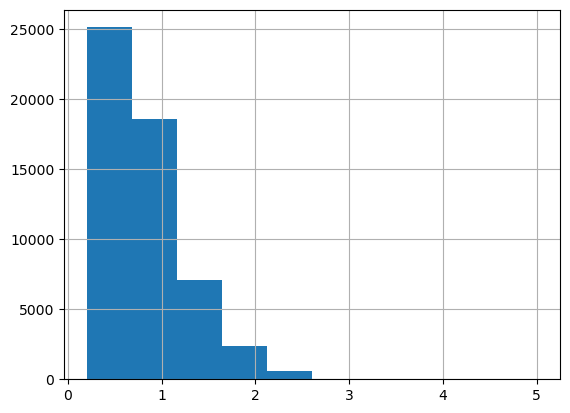

In [108]:
# Handling the outliers

df.carat.hist()
plt.show()

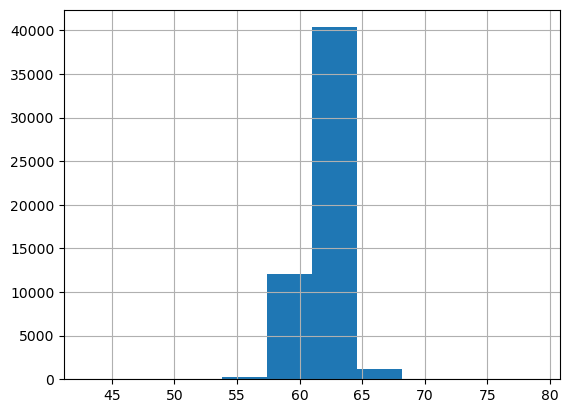

In [109]:
df.depth.hist()
plt.show()

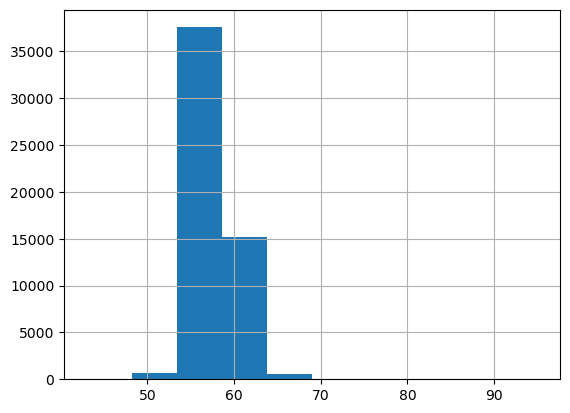

In [110]:
df.table.hist()
plt.show()

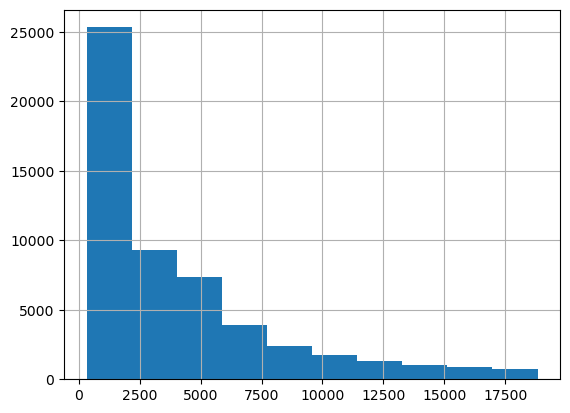

In [111]:
df.price.hist()
plt.show()

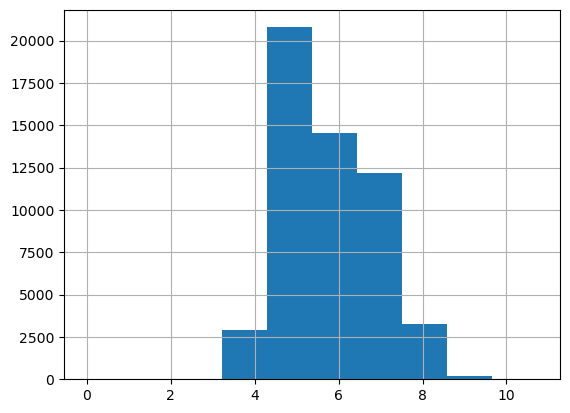

In [112]:
df.x_axis.hist()
plt.show()

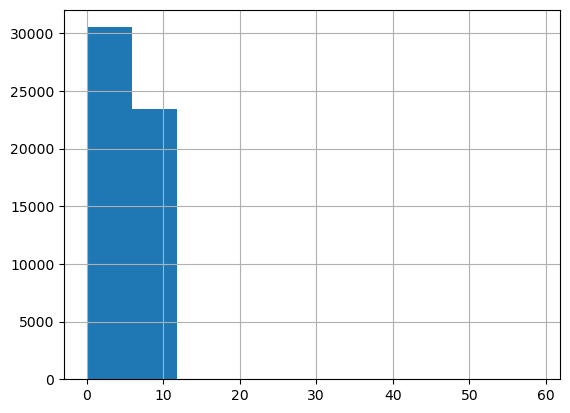

In [113]:
df.y_axis.hist()
plt.show()

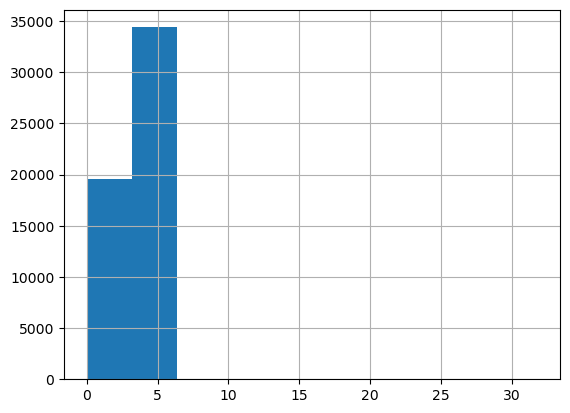

In [114]:
df.z_axis.hist()
plt.show()

In [115]:
# Handling the ouliers

from scipy import stats

numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols : 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR 
    df = df[(df[col]>= min_limit) & (df[col] <= max_limit)]
print('max_limit = ',max_limit)
print('min_limit = ',min_limit)

max_limit =  5.625
min_limit =  1.1850000000000003


In [116]:
# Conversion of categorical data

df.head()

,carat,cut,color,clarity,depth,table,price,x_axis,y_axis,z_axis
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


Now in this case we have cut in logical order and color, clarity does not have a specific order so for that reason we will have to use label encoder for cut and one hot encoding for colour and clarity

In [117]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols_to_encode = ['cut','clarity']

for col in cols_to_encode :
    df[col] = le.fit_transform(df[col])



In [118]:
df.head()

,carat,cut,color,clarity,depth,table,price,x_axis,y_axis,z_axis
0,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,J,7,62.8,57.0,336,3.94,3.96,2.48


In [119]:
df = pd.get_dummies(df,columns=['color'],drop_first = True)
df = df.astype(int)

In [121]:
df.head()

,carat,cut,clarity,depth,table,price,x_axis,y_axis,z_axis,color_E,color_F,color_G,color_H,color_I,color_J
0,0,2,3,61,55,326,3,3,2,1,0,0,0,0,0
1,0,3,2,59,61,326,3,3,2,1,0,0,0,0,0
3,0,3,5,62,58,334,4,4,2,0,0,0,0,1,0
4,0,1,3,63,58,335,4,4,2,0,0,0,0,0,1
5,0,4,7,62,57,336,3,3,2,0,0,0,0,0,1


# Train Test Split

In [124]:
X = df.drop('price',axis=1,inplace=False)
y = df.price

In [126]:
X

,carat,cut,clarity,depth,table,x_axis,y_axis,z_axis,color_E,color_F,color_G,color_H,color_I,color_J
0,0,2,3,61,55,3,3,2,1,0,0,0,0,0
1,0,3,2,59,61,3,3,2,1,0,0,0,0,0
3,0,3,5,62,58,4,4,2,0,0,0,0,1,0
4,0,1,3,63,58,4,4,2,0,0,0,0,0,1
5,0,4,7,62,57,3,3,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,2,2,60,57,5,5,3,0,0,0,0,0,0
53936,0,1,2,63,55,5,5,3,0,0,0,0,0,0
53937,0,4,2,62,60,5,5,3,0,0,0,0,0,0
53938,0,3,3,61,58,6,6,3,0,0,0,1,0,0


In [125]:
y

0         326
1         326
3         334
4         335
5         336
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 46532, dtype: int64

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [128]:
len(X_train)

37225

In [129]:
len(X_test)

9307

In [130]:
X_train

,carat,cut,clarity,depth,table,x_axis,y_axis,z_axis,color_E,color_F,color_G,color_H,color_I,color_J
45875,0,4,4,60,57,5,5,3,1,0,0,0,0,0
14596,1,3,5,60,59,7,6,4,0,0,0,0,1,0
7064,0,4,5,59,61,4,4,2,0,0,1,0,0,0
47335,0,4,6,63,54,3,3,2,1,0,0,0,0,0
27989,0,2,5,62,56,4,4,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,0,1,1,59,61,4,4,2,1,0,0,0,0,0
51990,0,2,1,61,56,5,5,3,0,0,1,0,0,0
44904,0,3,2,62,57,5,5,3,1,0,0,0,0,0
956,0,2,2,62,57,5,5,3,0,1,0,0,0,0


In [131]:
y_train

45875    1717
14596    5889
7064      579
47335     530
27989     658
         ... 
12377     597
51990    2442
44904    1630
956      2890
17220    6887
Name: price, Length: 37225, dtype: int64

In [132]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [133]:
LR.coef_

array([2145.11064773,   10.6167253 ,  183.40312853,  -29.68152716,
        -39.07152904,  740.13263288,  982.22760829,   40.45228331,
       -112.06336765,  -89.6358654 , -122.22472373, -426.65882727,
       -550.21504903, -949.86755505])

In [135]:
coefficients = LR.coef_


In [136]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

print(coef_df)

    Feature  Coefficient
0     carat  2145.110648
1       cut    10.616725
2   clarity   183.403129
3     depth   -29.681527
4     table   -39.071529
5    x_axis   740.132633
6    y_axis   982.227608
7    z_axis    40.452283
8   color_E  -112.063368
9   color_F   -89.635865
10  color_G  -122.224724
11  color_H  -426.658827
12  color_I  -550.215049
13  color_J  -949.867555


In [137]:
intercept = LR.intercept_

In [138]:
intercept

-2873.2433727957196

In [139]:
print("Columns in final dataset:")
print(df.columns.tolist())

Columns in final dataset:
['carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x_axis', 'y_axis', 'z_axis', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']


In [153]:
import pandas as pd

def predict_price(LR):
    cut_map = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
    clarity_map = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
    color_cols = ['color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']
    
    # Inputs
    carat = float(input("Carat: "))
    
    cut_input = input("Cut: ").strip().title()
    cut = cut_map.get(cut_input)

    clarity_input = input("Clarity: ").strip().upper()
    clarity = clarity_map.get(clarity_input)

    depth = float(input("Depth: "))
    table = float(input("Table: "))
    x, y, z = float(input("X: ")), float(input("Y: ")), float(input("Z: "))
    
    color = input("Color (D–J): ").strip().upper()

    # Handle errors for invalid inputs
    if cut is None or clarity is None:
        print("Invalid cut or clarity input.")
        return

    # One-hot encode color
    color_data = {col: 0 for col in color_cols}
    if f'color_{color}' in color_data:
        color_data[f'color_{color}'] = 1

    # Combine all features
    features = {
        'carat': carat, 'cut': cut, 'clarity': clarity,
        'depth': depth, 'table': table,
        'x_axis': x, 'y_axis': y, 'z_axis': z,
        **color_data
    }

    df = pd.DataFrame([features])
    print(f" Predicted Price: ${LR.predict(df)[0]:.2f}")



In [155]:
predict_price(LR)

Carat:  0.9
Cut:  Premium
Clarity:  VS2
Depth:  61.5
Table:  6.1
X:  6.2
Y:  3.8
Z:  3.8
Color (D–J):  G


 Predicted Price: $5928.45
